<a href="https://colab.research.google.com/github/sonudk/Introduction_to_AI_and_IoT-/blob/master/BHAKTI_TIME_linearData_sine_f_online_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [0]:
import numpy as np

### Generate data

In [0]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    # YOUR CODE HERE
    y = np.sin(x)
    return y

In [130]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [0]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,1)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    # YOUR CODE HERE
    x=np.array(np.random.random(N)*2*np.pi)
    #print(x)
    yd=np.zeros((N,1))
    for i in range(x.shape[0]):
      yd[i]=fx(x[i])
    return x, yd

In [132]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

In [0]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plotdata()

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [0]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    # YOUR CODE HERE
    A=np.zeros((len(x),D+1))
    for i in range(len(x)):
      for j in range(D+1):
        A[i][j]=x[i]**j
        
    return A

In [135]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

Test passed 👍


### Estimate Weights
Estimate w from yd and A. Use the least square solution you learnt in the video

In [0]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    # YOUR CODE HERE
    w = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),yd)
    return w

In [137]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

Test passed 👍


### Estimate y from the model, given x

In [0]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    # YOUR CODE HERE
    A=createA(x,len(w)-1)
    y=np.dot(A,w)
    return y

In [139]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

Test passed 👍


### Estimate Error
Find E as the mean squared error

In [0]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    # YOUR CODE HERE
    mse=0
    for i in range(len(y)):
      mse = mse + ((yd[i] - y[i]) * (yd[i] - y[i]))
    #mse = round(mse,2) 
    mse=mse/len(y)
    #print(mse)
    return mse

In [141]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

Test passed 👍


### Plotting


In [0]:
def plotModel(x, y, yd):
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])
    plt.show()

# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

In [0]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    x,yd=generateX_fx(N)
    A=createA(x,D)
    w=train_w(A, yd)
    y=predict_y(w, x)
    eta=1e-25
    for i in range(A.shape[0]):
      for j in range(D+1):
        w[j]=w[j]+eta*(2/N)*(yd[i] - y[i])*(x[i]**j)
        
    y=predict_y(w, x)
    mse=compute_mse(y, yd)
    
    
    return x, y, yd, w, mse

[[ 1.01798282]
 [-0.33796178]
 [-0.00359735]]
MSE on train data =  [0.10383728]


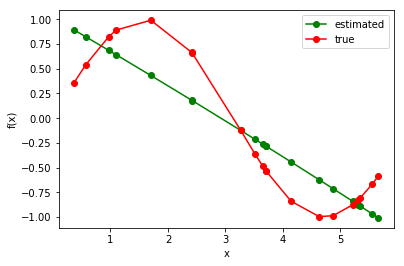

Test passed 👍


In [144]:
'''testing'''
def test_trainModel():
    N = 20
    D = 2
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==20
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_trainModel()

## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [0]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    x,yd=generateX_fx(Ntest)
    '''A=createA(x,D)
    w=train_w(A, yd)'''
    y=predict_y(w, x)
    mse=compute_mse(y, yd)
    return x, y, yd, mse

[[ 1.13495258e-01]
 [ 9.89718723e-01]
 [-4.39902207e-03]
 [-1.73588035e-01]
 [ 7.91825439e-03]
 [ 3.69438318e-03]
 [ 1.77205078e-03]
 [-6.40499480e-04]
 [ 6.79726093e-05]
 [-2.56065158e-06]
 [ 9.73382467e-09]]
MSE on train data =  [0.00372116]


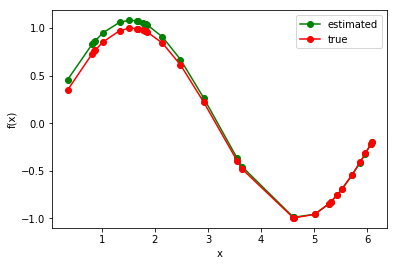

MSE on test data =  [0.0023696]
Test passed 👍


In [146]:
'''Testing'''
def test_testModel():
    N = 30
    D = 10
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==N
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    Ntest = 50
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    #plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_testModel()

# ADVANCED

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

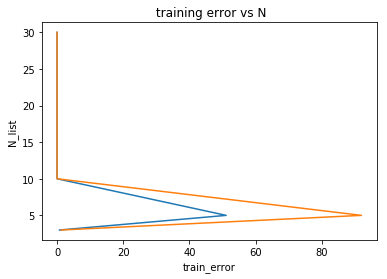

In [147]:
N_list=[3,5,10,30]
import matplotlib.pyplot as plt
D=5
train_error=[]
test_error=[]
for i in N_list:
  x, y, yd, w, mse=trainModel(i,D)
  train_error.append(mse)

  x, y, yd, mse=testModel(i,w)
  test_error.append(mse)
plt.plot(train_error,N_list)  
 

plt.xlabel('train_error')
plt.ylabel('N_list')
plt.title(' training error vs N')
plt.plot(test_error,N_list) 

Text(0.5, 1.0, ' training error vs D')

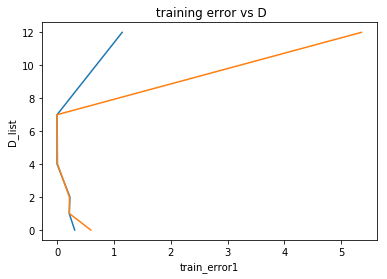

In [148]:
D_list=[0, 1, 2, 4, 7, 12]
N=10
train_error1=[]
test_error1=[]
for i in D_list:
  x, y, yd, w, mse=trainModel(N,i)
  train_error1.append(mse)
  x, y, yd, mse=testModel(N,w)
  test_error1.append(mse)
plt.plot(train_error1,D_list)
plt.plot(test_error1,D_list)

plt.xlabel('train_error1')
plt.ylabel('D_list')
plt.title(' training error vs D')

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D

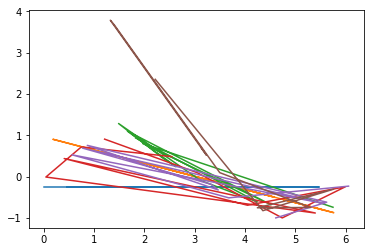

In [149]:
for i in D_list:
  x, y, yd, w, mse=trainModel(N,i)
  plt.plot(x,y)
  plt.plot()